(energypayback-climate)=
# Energetische Amortisation und Klimawirkung

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
Das sollen Sie lernen:
    <ul>
        <li> energetische Amortisation und Klimawirkung abschätzen </li>
        <li> mithilfe Literaturdaten und Annahmen </li>
        <li> um die Energieeffizienzmaßnahmen hinsichtlich energetischer und Klimawirkung über den Lebenszyklus zu bewerten </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.4.4
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>


### Grafikparameter einstellen

In [15]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Energetische Amortisationszeit ermitteln

### Definition

Die energetische Amortisationszeit (engl. *energy payback time*) für eine Energieeffizienzmaßnahme beinhaltet den energetischen Aufwand für jede Phase des Lebenszyklus:

Energieeinsparung (durch eine Maßnahme) über der Nutzungsdauer<br>
*minus* Energiebedarf in jeder Phase des Lebenszyklus<br>
*plus* Restwert (am besten Nutzungsdauer = Lebensdauer betrachten)<br>
*ergibt* energetischer Nutzen einer Energiesparmaßnahme

Die Werte für den Energieaufwand ergeben sich aus Ökobilanzen (siehe voriger Abschnitt) oder insbesondere für die Nutzungsphase aus Messungen bzw. Berechnungen des Energie-Lastprofils.

### Fiktives Beispiel

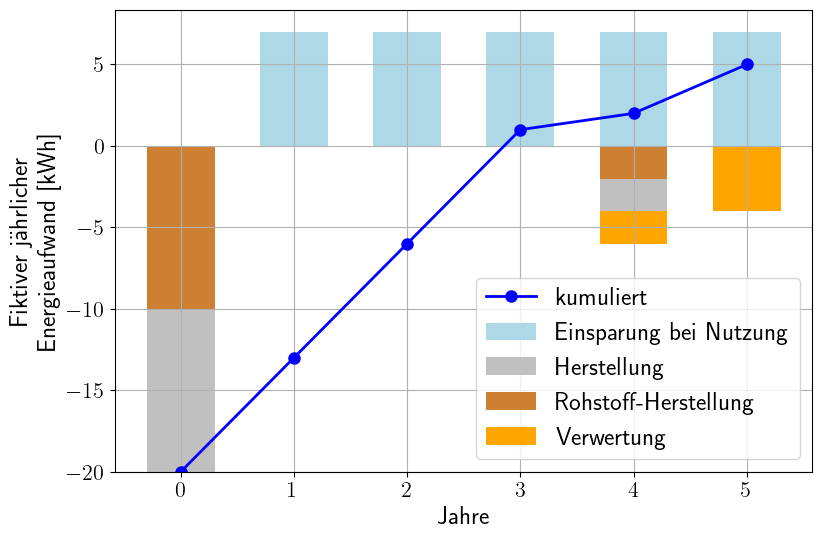

In [16]:
Jahre = np.array([0,1,2,3,4,5])
RohstoffHerstellung = np.array([-10,0,0,0,-2,0])
Herstellung = np.array([-10,0,0,0,-2,0])
EinsparungNutzung = np.array([0,7,7,7,7,7])
Verwertung = np.array([0,0,0,0,-2,-4])
Energiebilanz = np.cumsum(RohstoffHerstellung+Herstellung+EinsparungNutzung+Verwertung) 
plt.figure(figsize=(9,6))
plt.bar(Jahre, EinsparungNutzung, width=0.6, label='Einsparung bei Nutzung', color='lightblue')
plt.bar(Jahre, Herstellung, width=0.6, label='Herstellung', color='silver',bottom = RohstoffHerstellung)
plt.bar(Jahre, RohstoffHerstellung, width=0.6, label='Rohstoff-Herstellung', color='#CD7F32')
plt.bar(Jahre, Verwertung, width=0.6, label='Verwertung',color='orange',bottom = RohstoffHerstellung+Herstellung)
plt.plot(Jahre,Energiebilanz,'o-',color='blue',lw=2, label='kumuliert')
plt.xticks(Jahre)
plt.xlabel("Jahre")
plt.ylabel("Fiktiver jährlicher \nEnergieaufwand [kWh]")
plt.legend(loc="best")
plt.grid()
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Drehen Sie an den Zahlen, so dass eine Maßnahme mit konstanter jährlicher Einsparung sich gerade so nicht mehr rechnet. Wie unterscheiden sie sich dann? Welche Faktoren beeinflussen, ob eine Maßnahme sich über den Lebenszyklus rechnet?
</div>

*Antwort: ...*

## Klimawirkung oder CO$_2$-Fußabdruck

### Beispiel: Vergleich verschiedener Notebooks

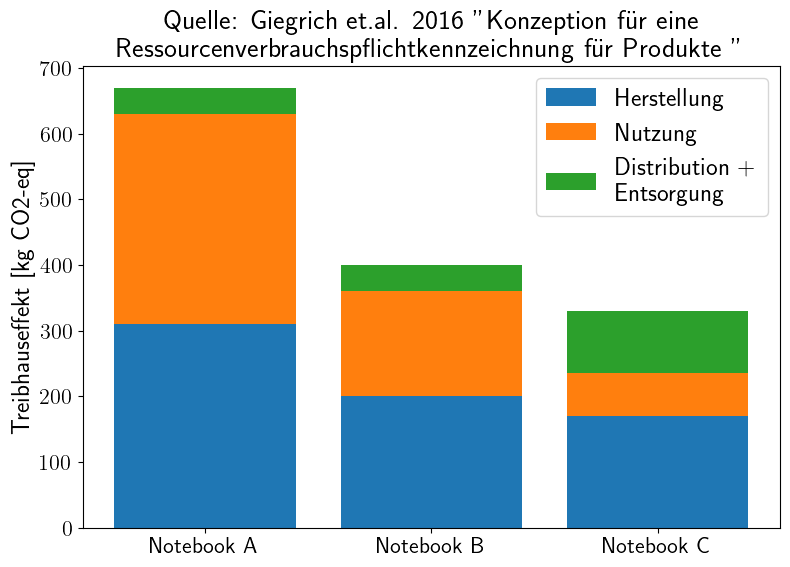

In [17]:
HerstellungNotebook = {'Indikator': ['Treibhauseffekt [kg CO2-eq]', 'Flächeninanspruchnahme [m² a]', 'Kumulierter Rohstoffaufwand (KRA) [kg]', 'Frischwasser [m³]', 'Kumulierter Energieaufwand (KEA) [GJ]'],
                      'Referenz': [310,5.7,2100,4.1,4.8],
                      'Notebook1': [200,4.7,980,4.1,2.4],
                      'Hocheffizient': [170,3.8,330,3.5,2.0]}
HerstellungNotebookDF = pd.DataFrame (HerstellungNotebook, columns = ['Indikator', 'Referenz', 'Notebook1', 'Hocheffizient'])
HerstellungNotebookDF = HerstellungNotebookDF.set_index('Indikator')
NutzungNotebook = {'Indikator': ['Treibhauseffekt [kg CO2-eq]', 'Flächeninanspruchnahme [m² a]', 'Kumulierter Rohstoffaufwand (KRA) [kg]', 'Frischwasser [m³]', 'Kumulierter Energieaufwand (KEA) [GJ]'],
                  'Referenz': [320, 1.9, 220, 2.6, 6.5],
                  'Notebook1': [160, 1.0, 110, 1.3, 3.3],
                  'Hocheffizient': [65, 0.4, 44, 0.52, 1.3]}
NutzungNotebookDF = pd.DataFrame (NutzungNotebook, columns = ['Indikator', 'Referenz', 'Notebook1', 'Hocheffizient'])
NutzungNotebookDF = NutzungNotebookDF.set_index('Indikator')
# Gesamt = Herstellung + Distribution + Nutzung + Entsorgung
GesamtNotebook = {'Indikator': ['Treibhauseffekt [kg CO2-eq]', 'Flächeninanspruchnahme [m² a]', 'Kumulierter Rohstoffaufwand (KRA) [kg]', 'Frischwasser [m³]', 'Kumulierter Energieaufwand (KEA) [GJ]'],
                 'Referenz': [670, 7.6, 2300, 6.5, 12],
                 'Notebook1': [400, 5.7, 1100, 5.5, 6.2],
                 'Hocheffizient': [330, 4.5, 430, 4.5, 4.9]}
GesamtNotebookDF = pd.DataFrame (GesamtNotebook, columns = ['Indikator', 'Referenz', 'Notebook1', 'Hocheffizient'])
GesamtNotebookDF = GesamtNotebookDF.set_index('Indikator')
DistroEntsorgungNotebookDF = GesamtNotebookDF.sub(HerstellungNotebookDF.add(NutzungNotebookDF,fill_value=0),fill_value=None)
ind = ['Notebook A', 'Notebook B', 'Notebook C']

Indikat = 'Treibhauseffekt [kg CO2-eq]'
plt.figure(figsize=(9,6))
plt.bar(ind,HerstellungNotebookDF.loc[Indikat],label='Herstellung')
plt.bar(ind,NutzungNotebookDF.loc[Indikat],label='Nutzung',bottom = HerstellungNotebookDF.loc[Indikat])
plt.bar(ind,DistroEntsorgungNotebookDF.loc[Indikat],label='Distribution + \nEntsorgung', bottom = HerstellungNotebookDF.loc[Indikat]+NutzungNotebookDF.loc[Indikat])
plt.legend(loc='best')
plt.ylabel(Indikat)
plt.title('Quelle: Giegrich et.al. 2016 "Konzeption für eine \nRessourcenverbrauchspflichtkennzeichnung für Produkte "')
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
    Ändern Sie den Inhalt der Variable <tt>Indikat</tt>, so, dass nun andere Größen angezeigt werden. Wie schneiden die Notebooks bei den anderen Indikatoren, insbesondere beim kumulierten Energieaufwand ab?
</div>

*Antwort:...*

### Zusammenhang CO$_2$-Fußabdruck und Energie

Der CO$_2$-Fußabdruck setzt sich zusammen aus den
- energetisch verursachten Treibhausgasemissionen und
- den stofflich verursachten Treibhausgasemissionen (z. B. Einsatz von FCKW, Waldabholzung, Stahlherstellung, Betonherstellung, etc.)

### Treibhausgasemissionen in CO$_2$ umrechnen

relatives Treibhausgaspotenzial GWP100 = in 100 Jahren gleicher Effekt wie CO$_2$

**Beispielwerte** {cite:p}`memmler_emissionsbilanz_2018`,  {cite:p}`arbeitskreis_na_172-00-03-01_ak__carbon__footprint__von_produkten_im_din-normenausschuss_grundlagen_des_umweltschutzes_nagus_din_2019`

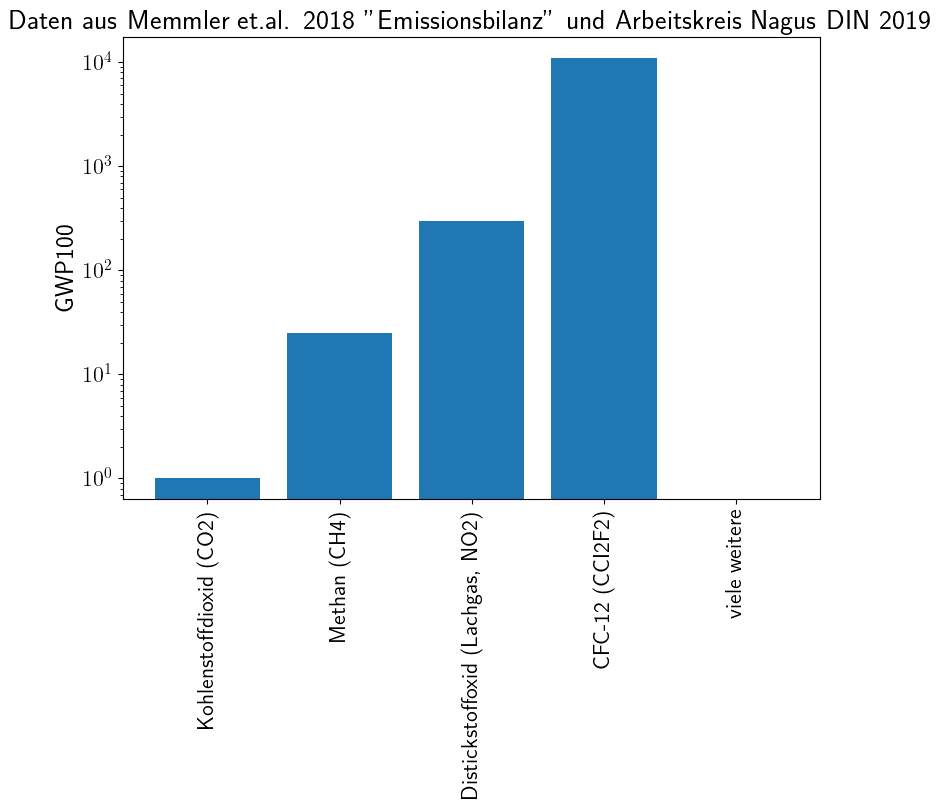

In [18]:
Stoffe = ['Kohlenstoffdioxid (CO2)', 'Methan (CH4)', 'Distickstoffoxid (Lachgas, NO2)', 'CFC-12 (CCI2F2)', 'viele weitere']
GWP100 = [1, 25, 298, 10900,0]
plt.figure(figsize=(9,6))
plt.bar(Stoffe,GWP100)
plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('GWP100')
plt.title('Daten aus Memmler et.al. 2018 "Emissionsbilanz" und Arbeitskreis Nagus DIN 2019')
plt.show()

### Treibhausgasemissionen durch den Strommix

Der Strommix variiert zeitlich: mittags erzeugen Photovoltaikanlagen mehr Energie, im Winter bläst der Wind stärker, etc.

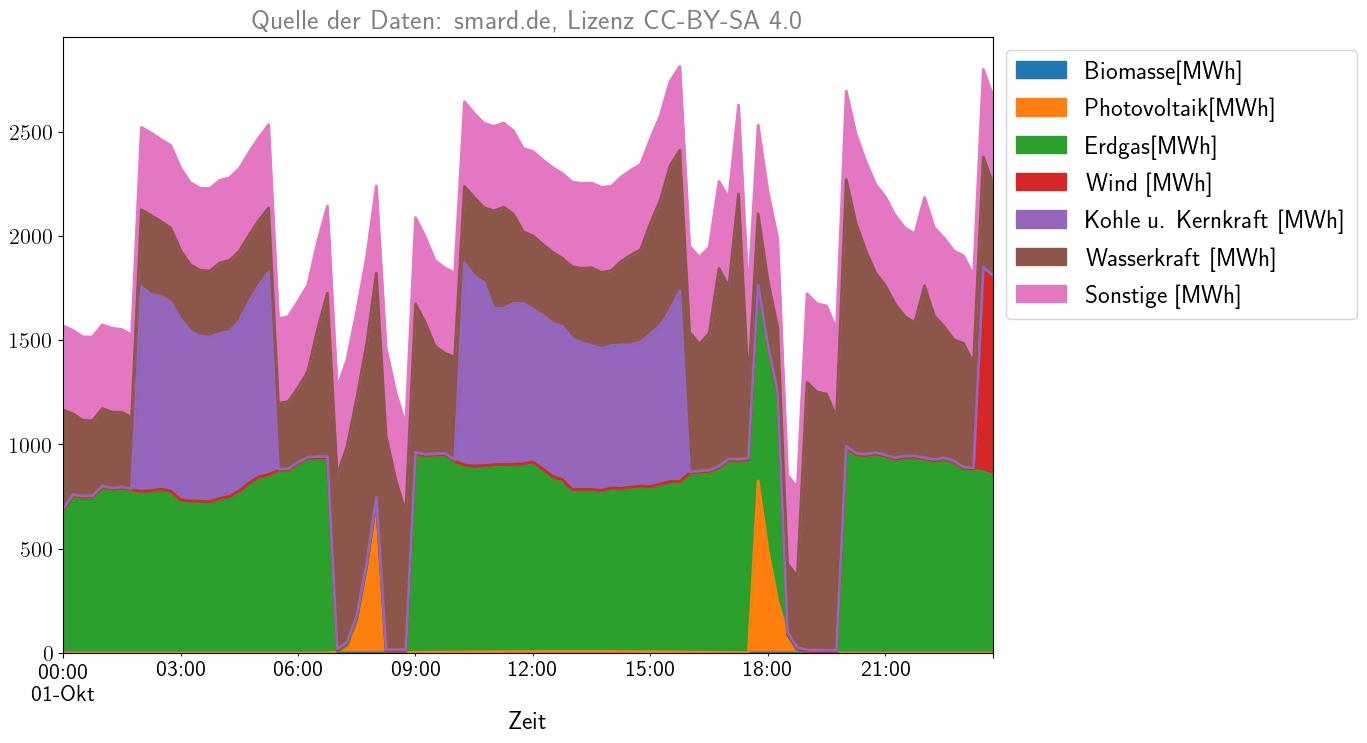

In [19]:
strommix_bsp = pd.read_csv('../data/Realisierte_Erzeugung_202110010000_202110012359.csv', sep=';')
strommix_bsp['Datum'] = pd.to_datetime(strommix_bsp['Datum'], format='%d.%m.%Y')
strommix_bsp['Uhrzeit'] = pd.to_datetime(strommix_bsp['Uhrzeit'], format='%H:%M')
timdel = strommix_bsp['Datum'][0]-strommix_bsp['Uhrzeit'][0]
strommix_bsp['Zeit'] = timdel+strommix_bsp['Uhrzeit']
strommix_bsp = strommix_bsp.set_index('Zeit')
strommix_bsp = strommix_bsp.apply(pd.to_numeric)#, errors='coerce', downcast='float')
strommix_bsp['Wind [MWh]'] = strommix_bsp['Wind Offshore[MWh]'] + strommix_bsp['Wind Onshore[MWh]']
strommix_bsp['Kohle u. Kernkraft [MWh]'] = strommix_bsp['Braunkohle[MWh]'] + strommix_bsp['Steinkohle[MWh]'] + strommix_bsp['Kernenergie[MWh]']
strommix_bsp['Wasserkraft [MWh]'] = strommix_bsp['Wasserkraft[MWh]'] + strommix_bsp['Pumpspeicher[MWh]']
strommix_bsp['Sonstige [MWh]'] = strommix_bsp['Sonstige Erneuerbare[MWh]'] + strommix_bsp['Sonstige Konventionelle[MWh]']
strommix_bsp = strommix_bsp.drop(['Datum', 'Uhrzeit', 
                                  'Wind Offshore[MWh]', 'Wind Onshore[MWh]',
                                  'Braunkohle[MWh]', 'Steinkohle[MWh]', 'Kernenergie[MWh]',
                                 'Wasserkraft[MWh]', 'Pumpspeicher[MWh]',
                                 'Sonstige Erneuerbare[MWh]', 'Sonstige Konventionelle[MWh]'], axis=1)
#strommix_bsp.plot(subplots=True)
strommix_bsp.plot.area(figsize=(12,8))
plt.title('Quelle der Daten: smard.de, Lizenz CC-BY-SA 4.0', color='gray')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In {cite:p}`may_influence_2019` wird der zeitlich aufgelöste Strommix aus SMARD mit dem jeweiligen CO$_2$-Fußabdruck jeder Stromart multipliziert. So ergibt sich der zeitlich zum Lastprofil passende Fußabdruck. Die dazu verwendeten Daten sind:

| **Energiequelle** | **g CO2/kWh** | **Quelle** |
|-|-|-|
|Biomasse | 272 | {cite:p}`memmler_emissionsbilanz_2018` |
| Wasserkraft | 3 | {cite:p}`memmler_emissionsbilanz_2018` |
| Pumpwasserspeicher | 26 | {cite:p}`memmler_emissionsbilanz_2018` | 
| Wind offshore | 6 | {cite:p}`memmler_emissionsbilanz_2018` |
| Wind onshore | 11 | {cite:p}`memmler_emissionsbilanz_2018` |
| Photovoltaik | 67 | {cite:p}`memmler_emissionsbilanz_2018` |
| Andere erneuerbare  | 192 | Annahme Geothermie nach {cite:p}`memmler_emissionsbilanz_2018` |
| Braunkohle | 1142 | {cite:p}`icha_entwicklung_2019` |
| Kohle | 815 | {cite:p}`icha_entwicklung_2019` | 
| Gas | 374 | {cite:p}`icha_entwicklung_2019` |
| Kernkraft | 32 | {cite:p}`fritsche_treibhausgasemissionen_2007` |
| Andere konventionelle | 486 | Annahme Deutscher Mix nach {cite:p}`icha_entwicklung_2019` |

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie wirkt sich die zeitliche Varianz des Strommix auf Ihren CO2-Fußabdruck aus? Finden Sie auf der SMARD-Seite heraus, wo die zeitlich variablen Stromerzeugungsanteile als Datei heruntergeladen werden können und nutzen Sie diese dann zur Bewertung Ihrer Lastprofile.
</div>

*Antwort: Die Datei liegt unter ...*

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche dieser Daten erfahren Veränderungen über der Zeit? Warum?
</div>

*Antwort: ...*

### Produkte hinsichtlich Klimawirkung bewerten

Der **product carbon footprint** beschreibt die produktspezifischen Klimawirkungen. Erste Unternehmen bieten Informationen zum PCF ihrer Produkte an, hier verlinkt ein Beispiel für einen [HP-Rechner](https://h22235.www2.hp.com/hpinfo/globalcitizenship/environment/productdata/Countries/_MultiCountry/productcarbonfootprint_deskto_2019111322482146.pdf)

**AUFGABE** Recherchieren Sie den PCF eines Produkts. Vergleichen Sie mit anderen Produkten und diskutieren Sie im Team, woher die Werte kommen könnten und wie plausibel sie erscheinen.

*Antwort:*

### Unternehmen bewerten hinsichtlich Klimawirkung

Teilweise fordern Kunden - um eine klimaneutrale Lieferkette sicherzustellen - den Nachweis der Klimaneutralität, beispielsweise nach GHG Protocol.

#### Greenhouse Gas Protocol (GHG Protocol)

[Standards für Unternehmen, Städte, Zielerreichung, Lieferkette, Politik, Produkte, Klimaschutzprojekte](https://ghgprotocol.org/standards)

GHG Protocol teilt die Emissionen in Scope 1,2 und 3 ein, wie im verlinkten [Video](https://www.youtube.com/watch?v=0KY3Jx4D8B8) zu sehen.

#### Berichterstattung von Treibhausgasemisssionen auf Organisationsebene nach ISO 14064-1:2018

Die ISO 14064-1 mündet anhand einer Treibhausgasbilanz und einem Bericht für eine Organisation in einer Treibhausgas-Erklärung. Verwandte Normen befassen sich mit der Dokumentation von Klimaschutzprojekten (ISO 14064-2), des CO$_2$-Fußabdrucks (ISO 14067), der Verifizierung von Erklärungen (ISO 14064-3), der Anforderungen an Verifizierungsstellen (ISO 14065) und den Kompetenzanforderungen an Teams zur Verifizierung (ISO 14066). Hinzu kommt die Definition der Klimaneutralität (ISO 14068).

Die Organisationsgrenzen orientieren sich an der Kontrollmöglichkeit (**Finanzkontrolle**) oder der **Beteiligung** (anteilige Meldung).

Es werden unterschieden:
- **direkte THG-Emissionen (+) und Entzug direkter THG (-)**: getrennt für CO$_2$, CH$_4$, N$_2$O, NF$_3$, SF$_6$ und andere angemessene THG-Gruppen in Tonnen CO$_2$-Äquivalent
- **indirekte THG-Emissionen**: Auswahl nach organisationsinternen Kriterien (z. B. Volumen, Einflussgrad), beinhaltet u.a. Energie, Transport, Produkt-assoziierte (eigene und fremde)

**alle Quellen und Senken für THG quantifizieren, sofern sie nicht vernachlässigbar sind (und die vernachlässigten begründen)**

Angabe nach GWP100, bezogen auf ein Basisjahr, um Trends zu ermitteln (funktionieren die Reduzierungsinitiativen?), inklusive Bewertung von Unsicherheiten

**Reduzierungsinitiativen**: z.B.
- Energiemanagement
- Energieeffizienz
- Technologie- und Prozessverbesserungen
- Abscheidung und Speicherung von THG
- Management des Transport- und Reiseaufwands
- Brennstoffumstellung
- Aufforstung
- Abfallminimierung
- alternative Brenn- und Rohstoffe zur Vermeidung von Mülldeponien oder -verbrennungen
- Kühlmittelmanagement

### Beispiele von Unternehmensangaben zu Klimaneutralität

{cite:p}`christian_wolbert_grune_2022` zeigt auf, dass die großen IT-Unternehmen Amazon, Apple, Google, Meta und Microsoft unterschiedliche Standards anlegen, um besonders klimaneutral zu erscheinen: 
- Amazons Klimaziel ist es, bis 2040 klimaneutral zu werden und der Konzern beschreibt nicht, ob dies mit dem Kauf von Zertifikaten passieren soll oder durch tatsächliche Emissionsreduktion.
- Apple hat zwar eine umfangreiche Datenbasis und fordert seine Zulieferer, Ökostrom zu nutzen, legt aber eher laxe Standards an die Beschaffung des Ökostroms an. 
- Google nennt sich selbst klimaneutral, berücksichtigt allerdings nicht die Herstellungemissionen für neue Server in seinen Rechenzentren. Außerdem gibt es Standorte, die fossile Energie nutzen, die dann mit erneuerbar erzeugter Energie anderswo gegengerechnet wird.

Diese Beispiele zeigen auf, dass unterschiedliche Akteure den Begriff **klimaneutral** verschieden definieren. Das bedeutet, dass die Vergleichbarkeit für Kunden nur aufwendig herzustellen ist. Außerdem ist es schwer, nachzuprüfen, ob die Informationen stimmen. 

## Genauigkeit und Varianz der ökologischen Kennwerte: Sensitivität betrachten

### Gründe für Varianz von Energiebedarf und Emissionen

- Herstellungsenergie und Emissionen hängen ab von
 - Klimatisierungs- / Heizungsbedarf
 - Anzahl von Standorten und Transporten dazwischen
 - Auslastung der Fabrik(en)
 - Ausbeute (Qualität) 
 - Herstellungstechnologie
 - Alter der Produktionsanlagen
 - Routine in der Fertigung, Produktionseffizienz
- Distribution, Marketing, etc. hängen ab von
 - Distanzen und Transportart
 - Genereller Aufwand (viel / wenig Werbung)
 - Verpackung(en)
 - Lieferzeiträume

### Beispiel mit fiktiven Werten

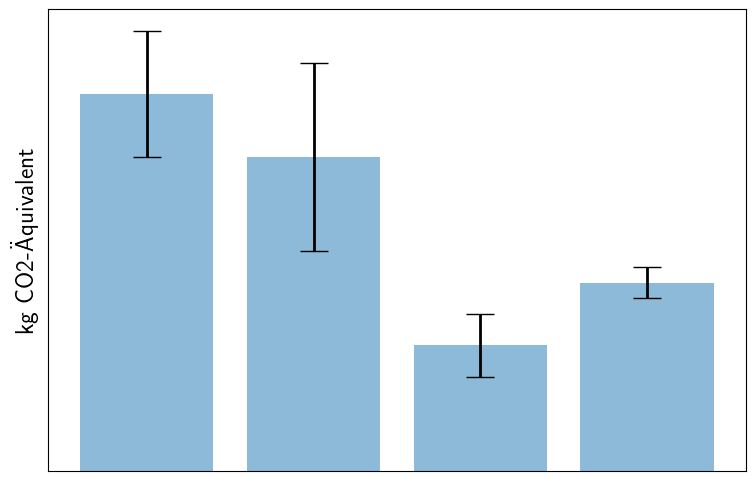

In [20]:
fiktivewerte = np.array([12,10,4,6])
fiktivesensitivi = np.array([2,3,1,0.5])
fiktion = np.array([1,2,3,4])
fix, ax = plt.subplots(figsize=(9,6))
ax.bar(fiktion,fiktivewerte,yerr=fiktivesensitivi,align='center',alpha=0.5,ecolor='black',capsize=10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('kg CO2-Äquivalent')
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Maßnahme ist wirklich besser?
</div>

*Antwort:...*

```{bibliography}
:filter: docname in docnames
```